### **Exploratory Data Analysis â€“ V-features vs Class**

#### 1. Focus on V-features + Target
- Selected only **V1â€“V28** and `Class` for correlation analysis.  
- Computed correlation matrix to assess feature relationships.  

#### 2. Correlation with Class
- Extracted correlations of each V-feature with `Class`.  
- Most features show weak correlation (expected from PCA transformation).  
- **Top correlated features with Class:**  
  - `V17`, `V14`, `V12`, `V10`, `V16`, `V3`, `V7`, `V11`, `V4`, `V18`  
- These features are likely to be the **most predictive** in fraud detection.  

#### 3. Correlation Heatmap
- Heatmap of V-features + `Class`.  
- Features appear **largely uncorrelated with each other**, avoiding multicollinearity issues.  
- A few features stand out with stronger alignment to `Class`.  

#### 4. Distribution of Top Features
- Violin plots show **feature distribution differences** between fraud (`Class=1`) and non-fraud (`Class=0`).  
- Fraudulent transactions often exhibit **wider or shifted distributions** in features like `V17`, `V14`, `V12`, `V10`, `V16`.  
- Some features (e.g., `V4`, `V18`) show subtler but noticeable separation.  

---

### **Key Takeaways**
- Although individual correlations are modest, certain V-features provide **valuable separation** between fraud and legitimate transactions.  
- These features should be prioritized in **model training and feature importance analysis**.  
- Overall, V-features capture hidden structure from PCA and remain central to fraud detection modeling.  


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inline
%matplotlib inline


In [3]:
df = pd.read_csv("../data/raw/creditcard.csv")
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [4]:
# Extract Hour from Time (convert seconds â†’ hours)
df["Hour"] = (df["Time"] // 3600) % 24

# Log-transform Amount
df["Amount_log"] = np.log1p(df["Amount"])

# Drop original Time column (redundant now)
df = df.drop(columns=["Time"])

df.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V23       V24       V25       V26  \
0  0.098698  0.363787  0.090794  ... -0.110474  0.066928  0.128539 -0.189115   
1  0.085102 -0.255425 -0.166974  ...  0.101288 -0.339846  0.167170  0.125895   
2  0.247676 -1.514654  0.207643  ...  0.909412 -0.689281 -0.327642 -0.139097   
3  0.377436 -1.387024 -0.054952  ... -0.190321 -1.175575  0.647376 -0.221929   
4 -0.270533  0.817739  0.753074  ... -0.137458  0.141267 -0.206010  0.502292   

        V27       V28  Amount  Class  Hour  Amount_log  
0  0.133558 -0.021053  149.62      0   0.0    5.014760  
1 -0.008983  0.014724    2.69      0   0.0    1.305626  
2 -0.055353 -0.059752  378.66      0   0.0    5.939276  
3  0.062723  0.061458  123.50      0   0.0    4.824306  
4  0.219422  0.215153   69.99      0   0.0    4.262539  

[5 rows x 32 columns]

In [8]:
# Focus only on V-features + Class
v_features = [col for col in df.columns if col.startswith("V")] + ["Class"]

corr_matrix = df[v_features].corr()
corr_matrix

V1            V2            V3            V4            V5  \
V1     1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16  1.812612e-17   
V2     4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15  5.157519e-16   
V3    -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16 -6.539009e-17   
V4    -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00 -1.719944e-15   
V5     1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15  1.000000e+00   
V6    -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16  2.408382e-16   
V7    -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16  2.715541e-16   
V8    -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16  7.437229e-16   
V9    -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16  7.391702e-16   
V10    7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16 -5.202306e-16   
V11    2.125498e-16  1.975426e-16  1.576830e-15  3.459380e-16  7.203963e-16   
V12    2.053457e-16 -9.568710e-17  6.310231e-16 -5.625518e-16  7.412552e-16   
V13   -2.425603e-17  6.295388e-16  2.807652e-16  1.303306e-16  5.886991e-16   
V14   -5.020280e-16 -1.730566e-16  4.739859e-16  2.282280e-16  6.565143e-16   
V15    3.547782e-16 -4.995814e-17  9.068793e-16  1.377649e-16 -8.720275e-16   
V16    7.212815e-17  1.177316e-17  8.299445e-16 -9.614528e-16  2.246261e-15   
V17   -3.879840e-16 -2.685296e-16  7.614712e-16 -2.699612e-16  1.281914e-16   
V18    3.230206e-17  3.284605e-16  1.509897e-16 -5.103644e-16  5.308590e-16   
V19    1.502024e-16 -7.118719e-18  3.463522e-16 -3.980557e-16 -1.450421e-16   
V20    4.654551e-16  2.506675e-16 -9.316409e-16 -1.857247e-16 -3.554057e-16   
V21   -2.457409e-16 -8.480447e-17  5.706192e-17 -1.949553e-16 -3.920976e-16   
V22   -4.290944e-16  1.526333e-16 -1.133902e-15 -6.276051e-17  1.253751e-16   
V23    6.168652e-16  1.634231e-16 -4.983035e-16  9.164206e-17 -8.428683e-18   
V24   -4.425156e-17  1.247925e-17  2.686834e-19  1.584638e-16 -1.149255e-15   
V25   -9.605737e-16 -4.478846e-16 -1.104734e-15  6.070716e-16  4.808532e-16   
V26   -1.581290e-17  2.057310e-16 -1.238062e-16 -4.247268e-16  4.319541e-16   
V27    1.198124e-16 -4.966953e-16  1.045747e-15  3.977061e-17  6.590482e-16   
V28    2.083082e-15 -5.093836e-16  9.775546e-16 -2.761403e-18 -5.613951e-18   
Class -1.013473e-01  9.128865e-02 -1.929608e-01  1.334475e-01 -9.497430e-02   

                 V6            V7            V8            V9           V10  \
V1    -6.506567e-16 -1.005191e-15 -2.433822e-16 -1.513678e-16  7.388135e-17   
V2     2.787346e-16  2.055934e-16 -5.377041e-17  1.978488e-17 -3.991394e-16   
V3     1.627627e-15  4.895305e-16 -1.268779e-15  5.568367e-16  1.156587e-15   
V4    -7.491959e-16 -4.104503e-16  5.697192e-16  6.923247e-16  2.232685e-16   
V5     2.408382e-16  2.715541e-16  7.437229e-16  7.391702e-16 -5.202306e-16   
V6     1.000000e+00  1.191668e-16 -1.104219e-16  4.131207e-16  5.932243e-17   
V7     1.191668e-16  1.000000e+00  3.344412e-16  1.122501e-15 -7.492834e-17   
V8    -1.104219e-16  3.344412e-16  1.000000e+00  4.356078e-16 -2.801370e-16   
V9     4.131207e-16  1.122501e-15  4.356078e-16  1.000000e+00 -4.642274e-16   
V10    5.932243e-17 -7.492834e-17 -2.801370e-16 -4.642274e-16  1.000000e+00   
V11    1.980503e-15  1.425248e-16  2.487043e-16  1.354680e-16 -4.622103e-16   
V12    2.375468e-16 -3.536655e-18  1.839891e-16 -1.079314e-15  1.771869e-15   
V13   -1.211182e-16  1.266462e-17 -2.921856e-16  2.251072e-15 -5.418460e-16   
V14    2.621312e-16  2.607772e-16 -8.599156e-16  3.784757e-15  2.635936e-16   
V15   -1.531188e-15 -1.690540e-16  4.127777e-16 -1.051167e-15  5.786332e-16   
V16    2.623672e-18  5.869302e-17 -5.254741e-16 -1.214086e-15  3.545450e-16   
V17    2.015618e-16  2.177192e-16 -2.269549e-16  1.113695e-15  1.542955e-15   
V18    1.223814e-16  7.604126e-17 -3.667974e-16  4.993240e-16  3.902423e-16   
V19   -1.865597e-16 -1.881008e-16 -3.875186e-16 -1.376135e-16  3.437633e-17   
V20   -1.858755e-16  9.379684e-16  2.033737e-16 -2.343720e-16 -1.3

In [10]:
# Display correlation of each feature with Class
corr_with_class = corr_matrix["Class"].drop("Class").sort_values(key=np.abs, ascending=False)
corr_with_class.head(15)

V17   -0.326481
V14   -0.302544
V12   -0.260593
V10   -0.216883
V16   -0.196539
V3    -0.192961
V7    -0.187257
V11    0.154876
V4     0.133447
V18   -0.111485
V1    -0.101347
V9    -0.097733
V5    -0.094974
V2     0.091289
V6    -0.043643
Name: Class, dtype: float64

### Correlation with Target
- Selected only **V-features** along with `Class`.  
- Computed correlation matrix.  
- Sorted correlations of features with `Class` (top 15 shown).  

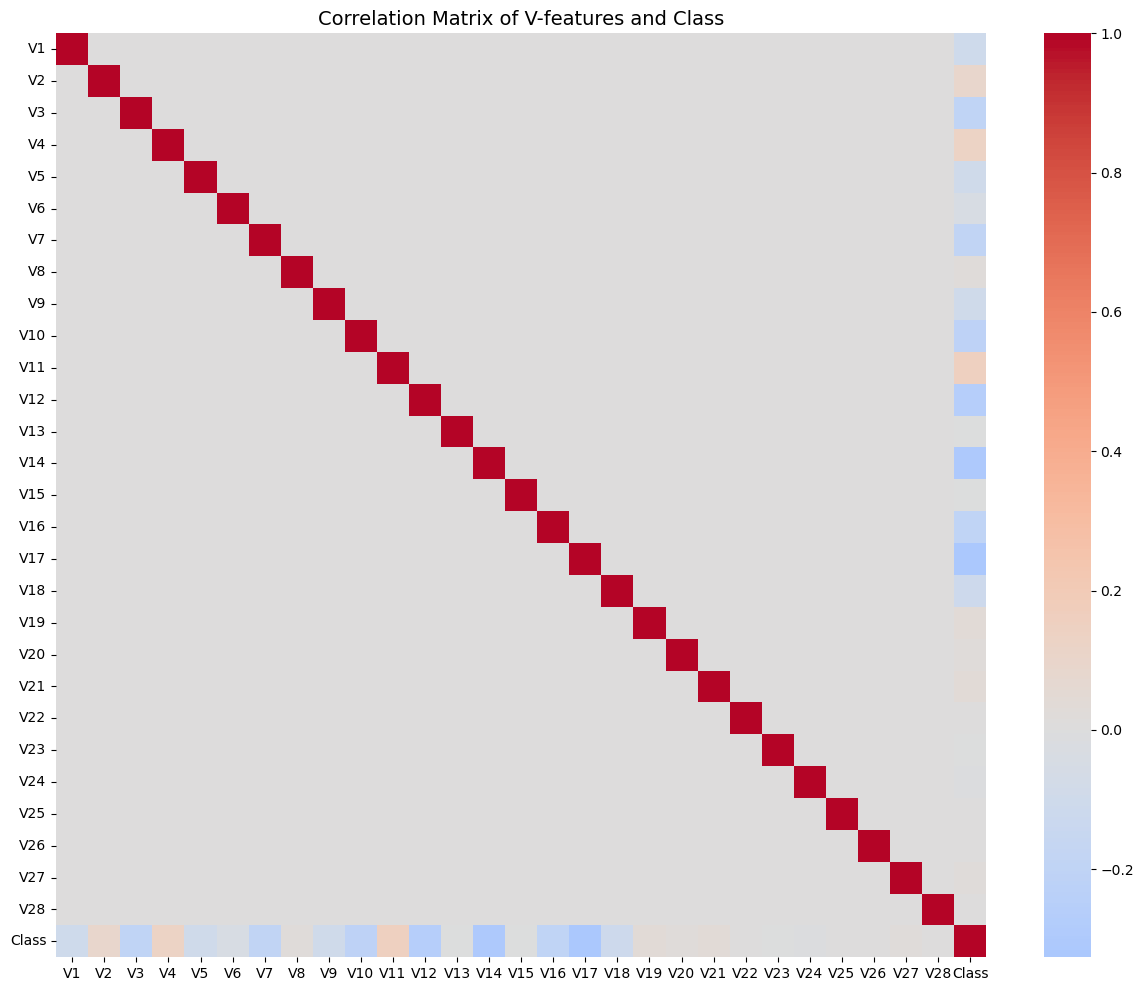

In [6]:
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, annot=False, cbar=True)
plt.title("Correlation Matrix of V-features and Class", fontsize=14)
plt.show()

In [7]:
top_features = corr_with_class.head(10).index.tolist()
print("Top correlated features with Class:\n", top_features)

Top correlated features with Class:
 ['V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V11', 'V4', 'V18']


### Correlation Matrix of V-features and Class
- Computed correlations of V1â€“V28 with the target `Class`.  
- Most features show **weak correlation** (expected from PCA transformation).  
- Some features stand out with stronger correlations to fraud.  

**Top correlated features with Class:**  
- `V17`, `V14`, `V12`, `V10`, `V16`, `V3`, `V7`, `V11`, `V4`, `V18`  

ðŸ‘‰ These features may carry the **most predictive power** for fraud detection and are good candidates for further analysis/modeling.  

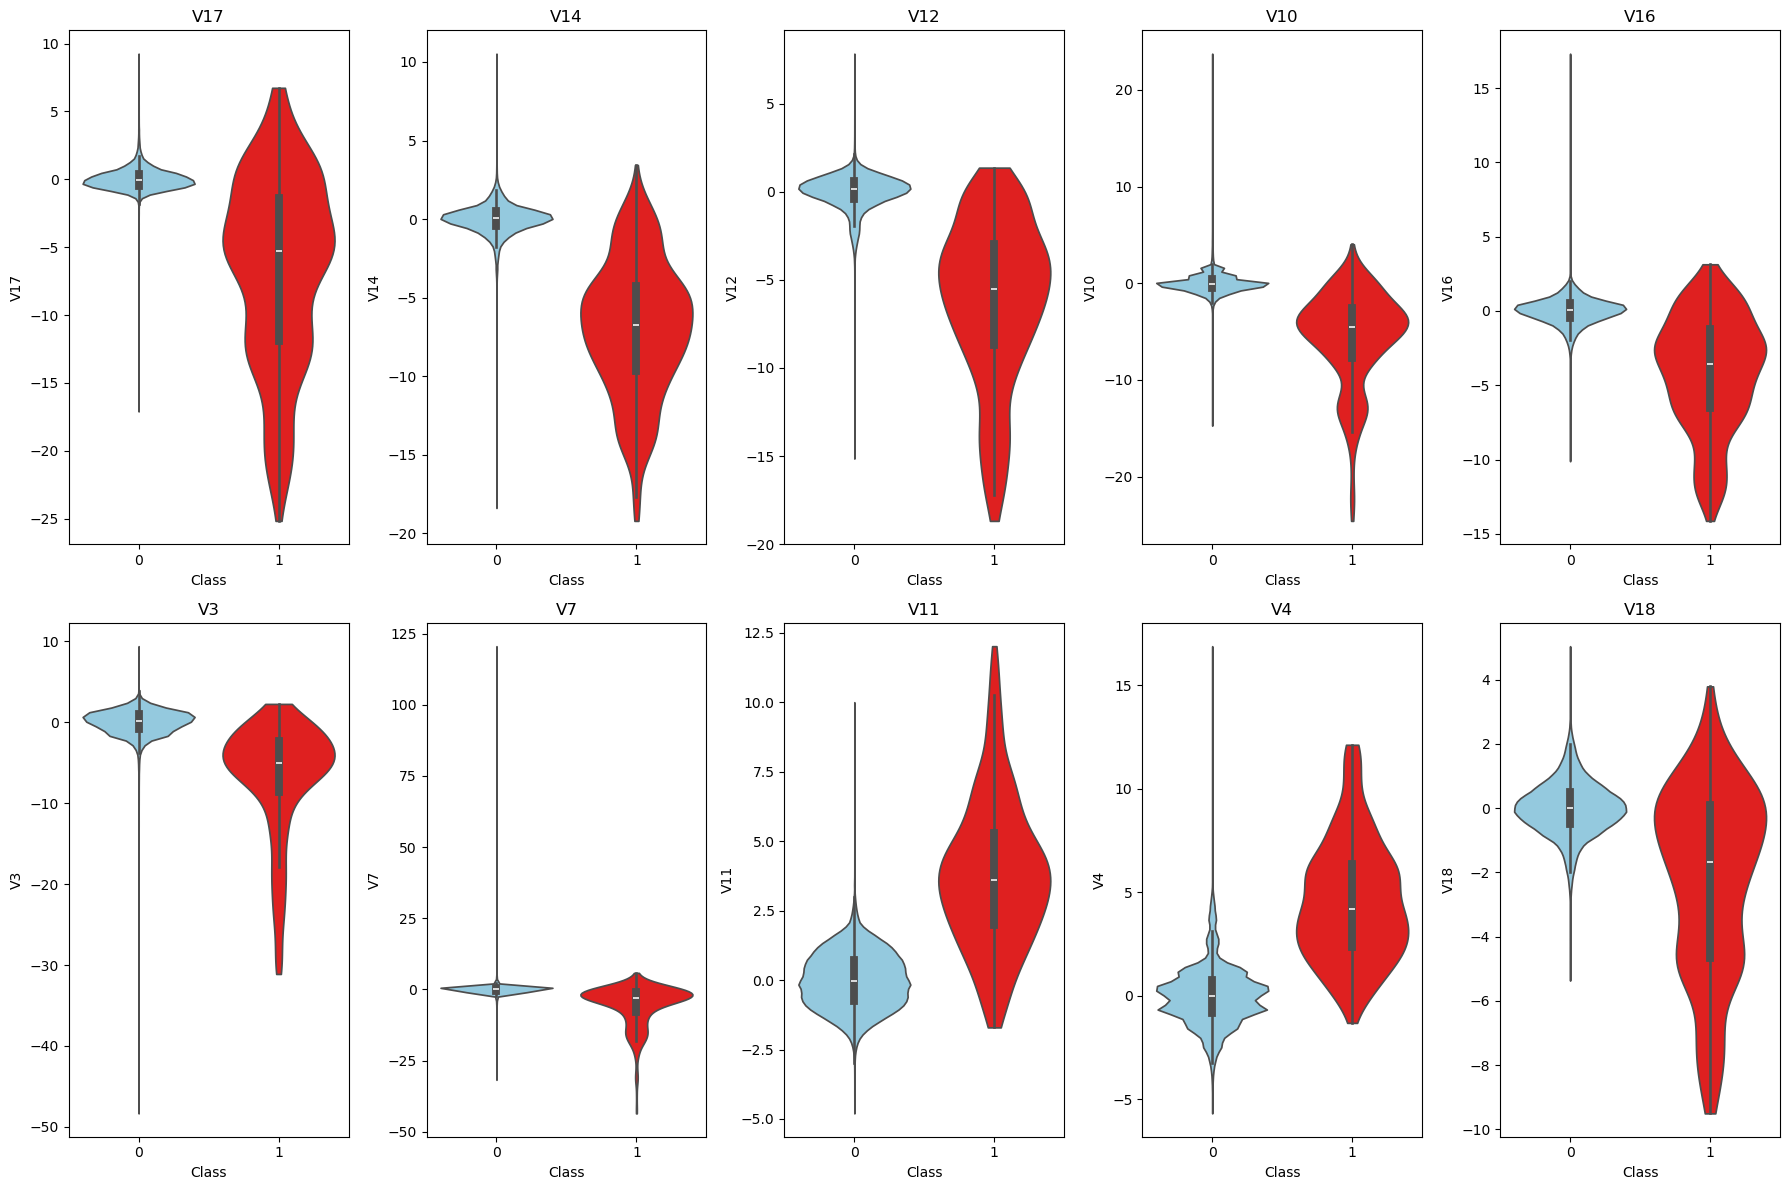

In [8]:
plt.figure(figsize=(18, 12))
for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 5, i)
    sns.violinplot(
        x="Class",
        y=feature,
        hue="Class",
        data=df,
        palette={0: "skyblue", 1: "red"},
        cut=0,
        density_norm="width",
        legend=False
    )
    plt.title(feature)
plt.tight_layout()
plt.savefig("../reports/figures/top_vfeatures_violin.png", bbox_inches="tight")
plt.show()

### Distribution of Top V-features by Class
- Plotted violin plots for the **top 10 correlated features** with `Class`.  
- Fraud cases (`Class = 1`, red) often show **distinct distributions** compared to non-fraud (`Class = 0`, blue).  
- Features like **V17, V14, V12, V10, V16** exhibit clear separation between fraud and non-fraud.  
- Some features (e.g., V4, V18) show smaller but noticeable distributional shifts.  

ðŸ‘‰ These differences indicate that these V-features capture meaningful variance between fraud and legitimate transactions, making them strong candidates for model training.  